<a href="https://colab.research.google.com/github/arthurmvo/Projeto-Fyurr/blob/master/Cointegra%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Bibliotecas
!pip install yfinance --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#@title Teste da Base de Dados
import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import coint
from joblib import Parallel, delayed
import multiprocessing

symbol = [ 

#FOREX

        'AUDCAD=X', 'AUDCHF=X', 'AUDJPY=X', 'AUDNZD=X', 'AUDUSD=X',
        'CADCHF=X', 'CADJPY=X', 'CHFJPY=X', 'EURAUD=X', 'EURCAD=X',
        'EURCHF=X', 'EURGBP=X', 'EURJPY=X', 'EURNZD=X', 'EURUSD=X',
        'GBPAUD=X', 'GBPCAD=X', 'GBPCHF=X', 'GBPJPY=X', 'GBPNZD=X',
        'GBPUSD=X', 'NZDCAD=X', 'NZDUSD=X', 'USDCAD=X', 'USDCHF=X', 
        'USDJPY=X', 

#STOCKS SP500

        # 'ALB', 'BDX', 'BUD', 'FE', 'GES', 'MA', 'MAR', 'MO', 'PM', 'SYY', 
        # 'TEVA', 'ADBE', 'ALGN', 'AMX', 'AWK', 'BABA', 'BBY', 'BNTX', 'CHTR', 
        # 'CMCSA', 'COF', 'DASH', 'DFS', 'EA', 'EBAY', 'EQIX', 'FTNT', 'HUM', 
        # 'IDXX', 'ILMN', 'KDP', 'LH', 'LNG', 'MCK', 'MCO', 'MDT', 'MMC', 'MRNA', 
        # 'NOC', 'NOW', 'NXPI', 'OXY', 'PEP', 'ROP', 'SNAP', 'SQ', 'SQM', 'TGT', 
        # 'TMO', 'TXN', 'UNH', 'VRTX', 'ZTO', 'IBM', 'UPS', 'ADSK', 'BR', 'CMG', 
        # 'CNQ', 'CVX', 'DHR', 'EOG', 'EPD', 'HAL', 'JD', 'KHC', 'KMI', 'MPLX', 
        # 'PAYC', 'PSX', 'RMD', 'SU', 'AAL', 'BX', 'ERIC', 'FAST', 'LLY', 'MSFT', 
        # 'NET', 'TMUS', 'WDAY', 'ZS', 'ACN', 'BAC', 'BYND', 'CL', 'DAL', 'DELL', 
        # 'EL', 'GLW', 'GM', 'HSY', 'IFF', 'INFY', 'MRVL', 'MU', 'NSC', 'NTES', 
        # 'PNC', 'PWR', 'TM', 'TSM', 'TTWO', 'USB', 'WBA', 'ABT', 'AMD', 
        # 'BIDU', 'CPNG', 'CSX', 'DDOG', 'LCID', 'RBLX', 'SHW', 'TTD', 'UBER', 
        # 'C', 'CNP', 'COP', 'ECL', 'ED', 'GD', 'HP', 'LMT', 'NIO', 'SPOT', 'TROW', 
        # 'ETR', 'FISV', 'ODFL', 'ORCL', 'PBR', 'RACE', 'WYNN', 'YUM', 'CVE', 'FDX', 
        # 'MPWR', 'MS', 'V', 'VMW', 'ABBV', 'CTRA', 'DLTR', 'DVN', 'EXC', 'FANG', 
        # 'GS', 'IMO', 'KO', 'PYPL', 'RTX', 'SE', 'SHOP', 'SRE', 'WIX', 'WMB', 'ZM', 
        # 'XEL', 'WM', 'WMT', 'BEP', 'CAG', 'DE', 'LI', 'TTE', 'BBD', 'FIS', 'GPN', 
        # 'LUV', 'MCD', 'WU', 'AEM', 'GOLD', 'LYB', 'NVS', 'VALE', 'SNPS', 'CMI', 
        # 'CSIQ', 'CTAS', 'HPQ', 'IT', 'PSA', 'TXRH', 'ANSS', 'BK', 'CSCO', 'DG', 
        # 'MLM', 'SONY', 'SPG', 'VRSN', 'PLD', 'ZTS', 'CDW', 'ETN', 'HCA', 'KLAC', 
        # 'MCHP', 'MTD', 'TSCO', 'AZO', 'BRFS', 'HES', 'ON', 'ORLY', 'PCG', 'REGN', 
        # 'SLB', 'EW', 'GIS', 'GOOG', 'GOOGL', 'MPC', 'MRK', 'VLO', 'XOM', 'AMAT', 
        # 'KKR', 'STLA', 'SO', 'JPM', 'CM', 'MNST', 'COST', 'BLK', 'NKE', 'PPG', 
        # 'SPGI', 'HLT', 'MFC', 'CRWD', 'INTC', 'ADI', 'HDB', 'LEN', 'MSCI', 
        # 'STZ', 'SYK', 'WEC', 'WEN', 'ADM', 'PXD', 'ICE', 'BCE', 'HAS', 'ULTA', 
        # 'LHX', 'HBAN', 'ASML', 'COIN', 'ISRG', 'WMG', 'O', 'PEG', 'VOD',


#B3 (IBOVESPA)

        # 'RRRP3.SA', 'ALSO3.SA', 'ALPA4.SA', 'ABEV3.SA', 'ARZZ3.SA', 'ASAI3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BPAN4.SA', 'BBSE3.SA', 
        # 'BBDC4.SA', 'BRAP4.SA', 'BBAS3.SA', 'BRKM5.SA', 'BRFS3.SA', 'CRFB3.SA', 'CCRO3.SA', 'CMIG4.SA', 'CIEL3.SA', 'COGN3.SA', 
        # 'CPLE6.SA', 'CSAN3.SA', 'CPFE3.SA', 'CMIN3.SA', 'CVCB3.SA', 'CYRE3.SA', 'DXCO3.SA', 'ECOR3.SA', 'ELET3.SA', 'ELET6.SA', 
        # 'ENBR3.SA', 'ENEV3.SA', 'EGIE3.SA', 'EQTL3.SA', 'EZTC3.SA', 'FLRY3.SA', 'GGBR4.SA', 'GOAU4.SA', 'GOLL4.SA', 'NTCO3.SA', 
        # 'SOMA3.SA', 'HAPV3.SA', 'HYPE3.SA', 'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 'RENT3.SA', 'LWSA3.SA', 'LREN3.SA', 'EMBR3.SA', 
        # 'MGLU3.SA', 'MRFG3.SA', 'CASH3.SA', 'BEEF3.SA', 'MRVE3.SA', 'MULT3.SA', 'PCAR3.SA', 'PETR3.SA', 'PETR4.SA', 'PRIO3.SA', 
        # 'QUAL3.SA', 'RADL3.SA', 'RDOR3.SA', 'RAIL3.SA', 'SBSP3.SA', 'SMTO3.SA', 'CSNA3.SA', 'SLCE3.SA', 'SUZB3.SA', 'PETZ3.SA', 
        # 'VIVT3.SA', 'TIMS3.SA', 'TOTS3.SA', 'UGPA3.SA', 'USIM5.SA', 'VALE3.SA', 'VIIA3.SA', 'VBBR3.SA', 'WEGE3.SA', 'YDUQ3.SA',
        # 'BBDC3.SA', 


]
start_date = "2022-04-20" # Data Inicial 
end_date = "2023-12-31" # Data final
interval = "1d" #1d = 1 dia, 60m = 60 minutos, 30m = 30 minutos, 15m = 15 minutos

# Dicionário para armazenar os dados de fechamento para cada par
forex_data = {}

# Baixa os dados de fechamento para vários pares de moedas de uma só vez
forex_data = yf.download(symbol, start=start_date, end=end_date, interval=interval)['Adj Close']

# Cria um DataFrame a partir do dicionário de dados de fechamento
df = pd.DataFrame(forex_data)

# Verifica se há valores NaN ou infinitos em cada par e imprime os pares que apresentam valores inválidos, juntamente com a data e hora correspondentes
for pair in df.columns:
    invalid_values = df[pair][df[pair].isna() | df[pair].isin([float('inf'), float('-inf')])]
    if not invalid_values.empty:
        print(f"{pair} apresenta valores inválidos nas seguintes datas e horários:")
        for index, value in invalid_values.items():
            print(f"{index}: {value}")

# Salva o DataFrame em um arquivo CSV
df.to_csv('forex_data.csv')

[*********************100%***********************]  26 of 26 completed


In [ ]:
#@title Cointegração
# Define o nível de significância alpha
alpha = 0.05

# Define o número de núcleos da CPU a serem usados
num_cores = multiprocessing.cpu_count()

# Função para calcular a cointegração entre dois pares
def calculate_coint(pair1, pair2):
    score, pvalue, _ = coint(df[pair1], df[pair2])
    if pvalue < alpha:
        return score
    else:
        return 0.0

# Calcula a matriz de cointegração em paralelo
coint_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
results = Parallel(n_jobs=num_cores)(delayed(calculate_coint)(i, j) for i in df.columns for j in df.columns)
index = 0
for i in df.columns:
    for j in df.columns:
        coint_matrix[i][j] = results[index]
        index += 1

# Define a diagonal da matriz de cointegração como 1.0
coint_matrix.values[tuple([range(len(df.columns))]*2)] = 1.0

# Imprime a matriz de cointegração
#print(coint_matrix)
print('Cointegração realizada com sucesso!')

Cointegração realizada com sucesso!


In [ ]:
#@title Filtro Cointegração
# Filtra a matriz de cointegração para obter os pares cointegrados
coint_pairs = coint_matrix[coint_matrix != 0].dropna(how='all').dropna(how='all', axis=1)

# Cria uma lista com os pares cointegrados
pairs_list = []
for i, j in zip(coint_pairs.stack().index.get_level_values(0), coint_pairs.stack().index.get_level_values(1)):
    pairs_list.append([i, j])

# Cria um DataFrame com os pares cointegrados
df_pairs = pd.DataFrame(pairs_list, columns=["Pair1", "Pair2"])

# Remove as linhas que contêm o mesmo par de moedas
df_pairs = df_pairs[df_pairs['Pair1'] != df_pairs['Pair2']]

# Imprime o DataFrame
#print(df_pairs)
print('Pares Filtrados com sucesso!')

# Salva o DataFrame em um arquivo CSV
df_pairs.to_csv('Pares_Cointegrados_-3_46.csv')

Pares Filtrados com sucesso!


Periodo: 200
Desvio Padrão: 1.5


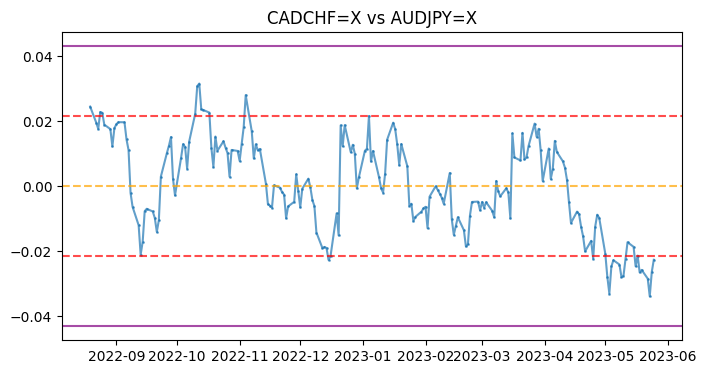

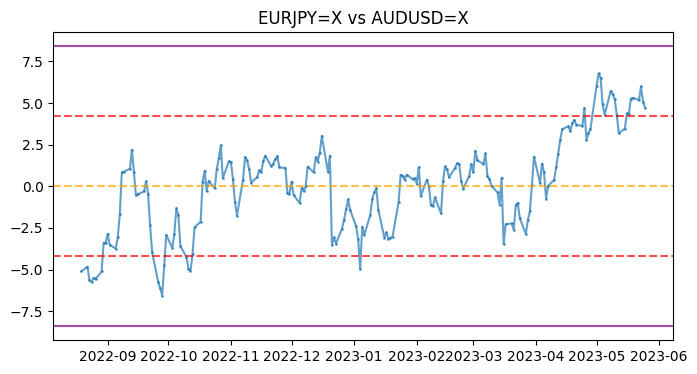

In [ ]:
#@title Screening Gráfico (OFICIAL)
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Solicita que o usuário insira o período de observação
period = int(input("Periodo: "))

# Solicita que o usuário insira o desvio padrão multiplicativo
std_dev_mult = float(input("Desvio Padrão: "))

# Cria um DataFrame vazio para armazenar os resultados
results_df = pd.DataFrame(columns=['pair1', 'pair2', 'corr', 'adf_stat', 'p_value'])

# Função para plotar os resíduos
def plot_residuals(residuals, std_dev_pos, std_dev_neg, title):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(residuals, marker='p', markersize=1, alpha=0.7)
    ax.axhline(y=std_dev_pos, color='red', linestyle='--', alpha=0.7,)
    ax.axhline(y=std_dev_neg, color='red', linestyle='--', alpha=0.7,)
    ax.axhline(y=std_dev_pos1, color='purple', linestyle='-', alpha=0.7,)
    ax.axhline(y=std_dev_neg1, color='purple', linestyle='-', alpha=0.7,)
    ax.axhline(y=0, color='orange', linestyle='--', alpha=0.7)
    ax.set_title(title)

# Loop para executar a regressão e filtrar os pares cointegrados
for pair in df_pairs.values:
    # Verifica se o par é diferente
    if pair[0] != pair[1]:
        # Seleciona os pares cointegrados
        pair1 = pair[0]
        pair2 = pair[1]

        # Cria um DataFrame com os preços de fechamento dos dois pares
        df = pd.DataFrame({'pair1': forex_data[pair1].tail(period), 'pair2': forex_data[pair2].tail(period)})

        # Regressão linear dos preços da pair1 em relação à pair2
        model = sm.OLS(df['pair1'], sm.add_constant(df['pair2'])).fit()

        # Calcula os resíduos
        residuals = df['pair1'] - model.predict(sm.add_constant(df['pair2']))

        # Calcula os desvios padrão dos resíduos
        std_dev = residuals.std()
        std_dev_pos = std_dev * std_dev_mult
        std_dev_neg = -std_dev * std_dev_mult
        std_dev_pos1 = std_dev * 3
        std_dev_neg1 = -std_dev * 3


        # Verifica se o resíduo está fora do intervalo de 2 desvios padrão positivo ou negativo
        if residuals.iloc[-1] > std_dev_pos or residuals.iloc[-1] < std_dev_neg:

            # Realiza o teste ADF nos resíduos
            adf_results = sm.tsa.stattools.adfuller(residuals)

            # Calcula a correlação entre os pares
            corr = df['pair1'].corr(df['pair2'])

            # Adiciona os resultados ao DataFrame
            results_df = pd.concat([results_df, pd.DataFrame({'pair1': [pair1], 'pair2': [pair2], 'corr': [corr], 'adf_stat': [adf_results[0]], 'p_value': [adf_results[1]]})], ignore_index=True)

            # Verifica se o par passou no filtro de ADF
            if adf_results[0] < -2.56:
                # Plota o gráfico de resíduos
                plot_residuals(residuals, std_dev_pos, std_dev_neg, f'{pair1} vs {pair2}')
                
        # Ordena a tabela de resultados pelo valor de ADF em ordem crescente
        results_df = results_df.sort_values('adf_stat')

# Filtra apenas os pares com adf_Stat menor que -2.56
results_df = results_df[results_df['adf_stat'] < -2.56]

Pair1: EURJPY=X
Pair2: GBPNZD=X
Periodo: 200
Desvio Padrão: 1.5
Período: 200
Correlação: 0.7112
Beta da cointegração: 56.8723
Resultado do teste ADF - Estatística: -3.9426, p-value: 0.0017
Valores de referência do teste ADF: 1%: -3.4636, 5%: -2.8762, 10%: -2.5746
1.5 desvios: 3.2552 , -3.2552 
3 desvios: 6.5104 , -6.5104 
Resíduo atual: 3.3910



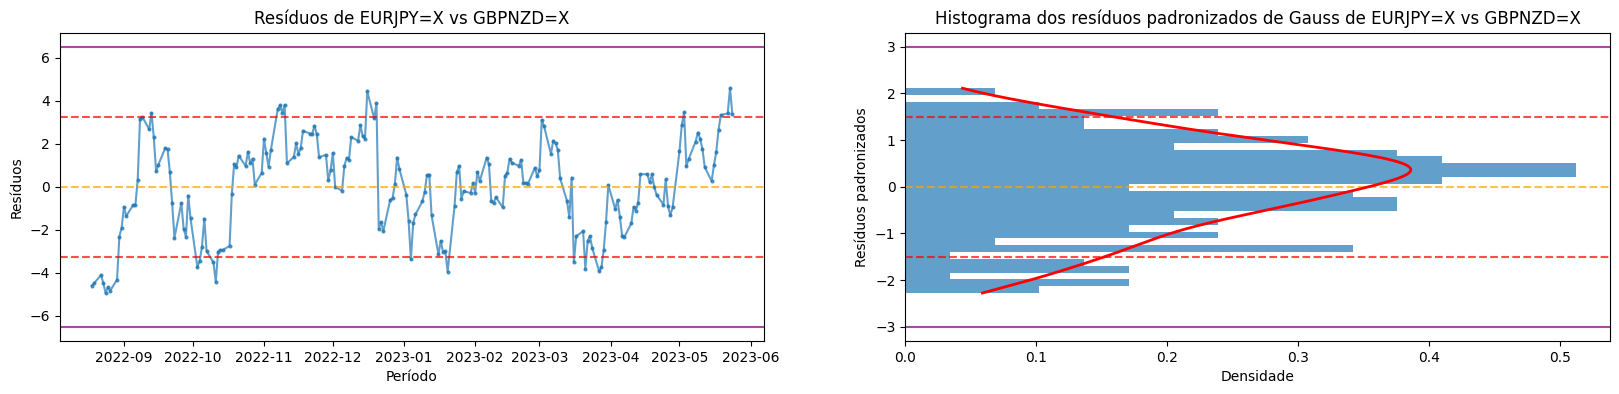

In [ ]:
#@title Ánalise Individual (OFICIAL)

import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import acf
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.api as sm

# Solicita ao usuário que insira o nome dos dois pares cointegrados
pair1 = input("Pair1: ")
pair2 = input("Pair2: ")

# Solicita ao usuário que insira o período de observação
period = int(input("Periodo: "))

# Solicita que o usuário insira o desvio padrão multiplicativo
std_dev_mult = float(input("Desvio Padrão: "))

# Cria um DataFrame com os preços de fechamento dos dois pares
df = pd.DataFrame({
'pair1': forex_data[pair1].tail(period),
'pair2': forex_data[pair2].tail(period)
})

# Calcula a correlação
corr = df.corr().iloc[0, 1]

# Realiza a regressão linear dos preços de pair1 em relação a pair2
model = sm.OLS(df['pair1'], sm.add_constant(df['pair2'])).fit()

# Calcula o beta da cointegração
beta = model.params['pair2']

# Calcula os resíduos
residuals = df['pair1'] - model.predict(sm.add_constant(df['pair2']))

# Realiza o teste de cointegração
result = sm.tsa.stattools.coint(df['pair1'], df['pair2'])

# Calcula a média e o desvio padrão dos resíduos
residuals_mean = residuals.mean()
residuals_std = residuals.std()

# Calcula os resíduos padronizados de Gauss
gaussian_resid = (residuals - residuals_mean) / residuals_std

# Realiza o teste ADF nos resíduos
adf_results = sm.tsa.stattools.adfuller(residuals)

# Calcula os valores importantes dos resíduos
std_dev = residuals.std()
std_dev_pos = std_dev * std_dev_mult
std_dev_neg = -std_dev * std_dev_mult
std_dev_pos1 = std_dev * 3
std_dev_neg1 = -std_dev * 3
current_residual = residuals.tail(1).iloc[0]

# Cria a string com as informações relevantes
info_string = (
f"Período: {period}\n"
f"Correlação: {corr:.4f}\n"
f"Beta da cointegração: {beta:.4f}\n"
f"Resultado do teste ADF - Estatística: {adf_results[0]:.4f}, p-value: {adf_results[1]:.4f}\n"
f"Valores de referência do teste ADF: 1%: {adf_results[4]['1%']:.4f}, 5%: {adf_results[4]['5%']:.4f}, 10%: {adf_results[4]['10%']:.4f}\n"
f"{std_dev_mult} desvios: {std_dev_pos:.4f} , {std_dev_neg:.4f} \n"
f"3 desvios: {std_dev_pos1:.4f} , {std_dev_neg1:.4f} \n"
f"Resíduo atual: {current_residual:.4f}\n"
)
# Imprime as informações
print(info_string)

# Cria uma figura com dois eixos
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))

# Plota o gráfico de resíduos no primeiro eixo da primeira coluna
ax1.plot(residuals, marker='o', markersize=2, alpha=0.7)
ax1.axhline(y=std_dev_pos, color='red', linestyle='--', alpha=0.7)
ax1.axhline(y=std_dev_neg, color='red', linestyle='--', alpha=0.7)
ax1.axhline(y=1*std_dev_pos1, color='purple', linestyle='-', alpha=0.7)
ax1.axhline(y=1*std_dev_neg1, color='purple', linestyle='-', alpha=0.7)
ax1.axhline(y=0, color='orange', linestyle='--', alpha=0.7)
ax1.set_title(f"Resíduos de {pair1} vs {pair2}")
ax1.set_xlabel("Período")
ax1.set_ylabel("Resíduos")

# Plota o histograma dos resíduos padronizados de Gauss no primeiro eixo da segunda coluna, invertendo os eixos
ax2.hist(gaussian_resid, bins=30, alpha=0.7, density=True, orientation='horizontal')
ax2.axhline(std_dev_mult, color='red', linestyle='--', alpha=0.7)
ax2.axhline(-std_dev_mult, color='red', linestyle='--', alpha=0.7)
ax2.axhline(3, color='purple', linestyle='-', alpha=0.7)
ax2.axhline(-3, color='purple', linestyle='-', alpha=0.7)
ax2.axhline(y=0, color='orange', linestyle='--', alpha=0.7)
ax2.set_title(f"Histograma dos resíduos padronizados de Gauss de {pair1} vs {pair2}")
ax2.set_xlabel("Densidade")
ax2.set_ylabel("Resíduos padronizados")

# Plota a curva de densidade dos resíduos padronizados de Gauss no primeiro eixo da segunda coluna
x = np.linspace(gaussian_resid.min(), gaussian_resid.max(), 1000)
y = sm.nonparametric.KDEUnivariate(gaussian_resid)
y.fit()
ax2.plot(y.evaluate(x), x, linestyle='-', color='red', linewidth=2.0, label="Curva de densidade")

# Mostra os gráficos
plt.show()

In [ ]:
#@title Teste ADF
import pandas as pd
import statsmodels.api as sm

# Solicita ao usuário que insira o nome dos dois pares cointegrados
pair1 = input("Pair1: ") 
pair2 = input("Pair2: ")

# Define os períodos de observação
period_start_ADF = 100
period_end_ADF = 250
step_ADF = 10

# Inicializa uma lista para armazenar as informações do teste ADF
adf_info = []

# Loop pelos diferentes períodos de observação
for period in range(period_start_ADF, period_end_ADF+1, step_ADF):
    
    # Cria um DataFrame com os preços de fechamento dos dois pares
    df = pd.DataFrame({
        'pair1': forex_data[pair1].tail(period), 
        'pair2': forex_data[pair2].tail(period)
    })

    # Realiza a regressão linear dos preços de pair1 em relação a pair2
    model = sm.OLS(df['pair1'], sm.add_constant(df['pair2'])).fit()

    # Calcula os resíduos
    residuals = df['pair1'] - model.predict(sm.add_constant(df['pair2']))

    # Realiza o teste ADF nos resíduos
    adf_results = sm.tsa.stattools.adfuller(residuals)

    # Armazena as informações do teste ADF na lista
    adf_info.append([period, adf_results[0]])

# Cria um DataFrame com as informações do teste ADF
adf_df = pd.DataFrame(adf_info, columns=['Periodo', 'ADF'])

# Imprime a tabela com as informações do teste ADF
print(adf_df)

Pair1: EURJPY=X
Pair2: GBPNZD=X
    Periodo       ADF
0       100 -2.819046
1       110 -3.082450
2       120 -3.344161
3       130 -3.594070
4       140 -3.794756
5       150 -3.630283
6       160 -3.889656
7       170 -3.531463
8       180 -3.698229
9       190 -3.835739
10      200 -3.942641
11      210 -4.054842
12      220 -3.256550
13      230 -3.412196
14      240 -3.336675
15      250 -3.529862
